# Read data

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd

In [49]:
# read train.csv
train_df = pd.read_csv("dataset/train.csv")
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
264407,id0494752,1,2016-03-03 17:48:19,2016-03-03 18:11:20,1,-73.965057,40.695347,-73.965057,40.695347,N,1381
1173754,id2426236,2,2016-04-29 19:14:47,2016-04-29 19:18:17,1,-73.982208,40.770580,-73.983818,40.766468,N,210
1255209,id2112795,2,2016-04-07 12:58:29,2016-04-07 13:15:36,1,-74.005730,40.737537,-73.983894,40.746258,N,1027
1087470,id0363020,1,2016-04-14 22:05:12,2016-04-14 22:05:25,2,-74.007729,40.732830,-74.008194,40.732742,N,13
219000,id3992281,2,2016-02-29 20:26:29,2016-02-29 20:34:14,2,-73.986816,40.756641,-73.986588,40.772011,N,465
644393,id3405628,1,2016-01-07 17:21:29,2016-01-07 17:21:41,1,-74.007782,40.705532,-74.007782,40.705532,N,12
868898,id2638444,2,2016-04-09 06:58:25,2016-04-09 07:05:12,1,-73.941208,40.799282,-73.944084,40.813793,N,407
384585,id0355159,1,2016-05-05 19:08:03,2016-05-05 19:23:59,2,-73.952995,40.777466,-73.982201,40.772751,N,956
308925,id1715420,2,2016-06-19 13:00:55,2016-06-19 13:08:17,6,-73.995461,40.754581,-74.001595,40.761261,N,442
62085,id1824882,2,2016-06-06 07:40:02,2016-06-06 07:43:08,2,-73.953613,40.767109,-73.946991,40.772598,N,186


In [50]:
# explore train.csv
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# preprocessing data

In [51]:
def preprocessing(data_df):
    # remove any rows with missing data
    data_df = data_df.dropna()

    # convert pickup and dropoff datetime to datetime format
    data_df['pickup_datetime'] = pd.to_datetime(data_df['pickup_datetime'])
    data_df['dropoff_datetime'] = pd.to_datetime(data_df['dropoff_datetime'])

    # split datetime into month, day, week and hour
    data_df['day'] = data_df['pickup_datetime'].dt.day
    data_df['hour'] = data_df['pickup_datetime'].dt.hour
    data_df['month'] = data_df['pickup_datetime'].dt.month
    data_df['week'] = data_df['pickup_datetime'].dt.dayofweek
    return data_df


In [52]:
train_df = preprocessing(train_df)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,month,week
205355,id2158066,1,2016-04-04 12:00:05,2016-04-04 12:39:28,1,-73.994667,40.750538,-73.970642,40.757500,N,2363,4,12,4,0
548271,id3315624,2,2016-05-25 11:07:45,2016-05-25 11:30:15,1,-73.992859,40.752899,-73.973587,40.779572,N,1350,25,11,5,2
615675,id3816812,1,2016-06-06 22:49:26,2016-06-06 22:55:29,1,-73.975922,40.751804,-73.976044,40.751827,N,363,6,22,6,0
1280487,id2106314,1,2016-01-20 21:49:46,2016-01-20 22:04:19,2,-73.978256,40.752010,-73.980949,40.782612,N,873,20,21,1,2
1330481,id0670608,1,2016-03-03 10:54:44,2016-03-03 11:10:26,1,-73.980713,40.733814,-73.968521,40.760799,N,942,3,10,3,3
283136,id3099465,2,2016-02-21 23:13:02,2016-02-21 23:16:42,2,-73.949455,40.680431,-73.943558,40.684055,N,220,21,23,2,6
1435364,id1932439,2,2016-02-03 07:46:33,2016-02-03 07:57:56,1,-73.969238,40.790241,-73.961342,40.802479,N,683,3,7,2,2
500951,id1943266,1,2016-03-04 08:00:29,2016-03-04 08:05:17,1,-73.955093,40.783241,-73.962120,40.773338,N,288,4,8,3,4
887217,id0030278,1,2016-01-27 16:27:46,2016-01-27 16:38:39,1,-73.958954,40.780937,-73.980576,40.785839,N,653,27,16,1,2
635993,id0430549,2,2016-05-18 23:46:55,2016-05-19 00:23:41,1,-73.789223,40.647171,-73.991653,40.770626,N,2206,18,23,5,2


# data Analysis & visualization 

In [68]:


def categorical_histogram(data, column):
    categories = data[column].unique()
    num_categories = len(categories)
    colors = plt.cm.tab10(np.linspace(0, 1, num_categories))
    
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color=colors)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Histogram of '+column)
    plt.show()



def numerical_histogram(data, column):
    fig, axs = plt.subplots(1, 1, figsize=(10, 4))
    # the x axis should be not be in float format
    axs.xaxis.set_major_locator(MaxNLocator(integer=True))
    # split the histogram into 100 bins
    axs.hist(data[column], bins=100)

    
    axs.set_title('Histogram of '+column)
    axs.set_xlabel(column)
    axs.set_ylabel('Count')
    plt.show()
    
def numerical_histogram_columns(data, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(16, 4))
    for i in range(len(columns)):
        # split the histogram into 100 bins
        axs[i].hist(data[columns[i]], bins=100)
        #axs[i].hist(data[columns[i]])
        axs[i].set_title('Histogram of '+columns[i])
        axs[i].set_xlabel(columns[i])
        axs[i].set_ylabel('Count')
    plt.show()

def scatter_plot(data, x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter plot of '+x+' vs '+y)
    plt.show()


## vendor_id

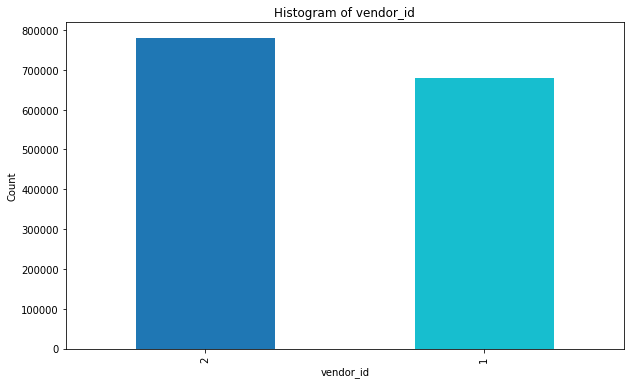

In [54]:
# plot histogram of vendor_id
categorical_histogram(train_df, "vendor_id")

* there are only two vendor_id in the data set, 1 and 2
* vendor_id 2 has more trips than vendor_id 1

## passenger_count

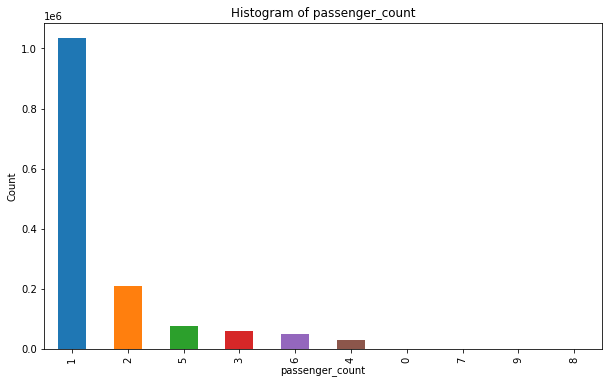

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [55]:
categorical_histogram(train_df, "passenger_count")
# print count values of passenger_count
train_df['passenger_count'].value_counts()

* Most of the trips have 1 or 2 passengers and there are some trips with 0 passengers

## pickup hour, day and pickup month

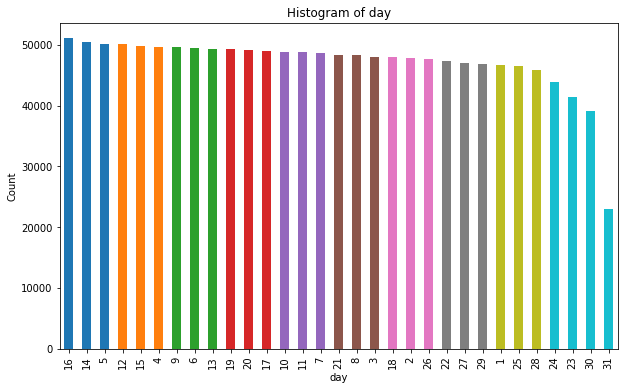

In [56]:
categorical_histogram(train_df, "day")

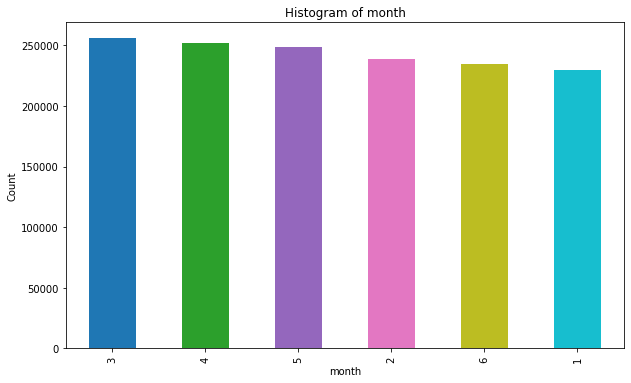

In [57]:
categorical_histogram(train_df, "month")

## pickup hour

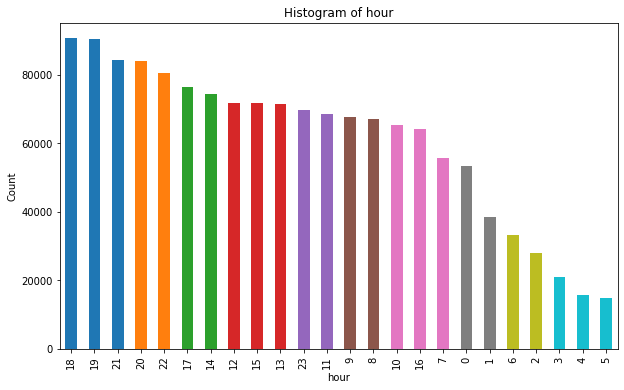

In [58]:
categorical_histogram(train_df, "hour")

* most hours of the day are 6,7 PM

## store_and_fwd_flag

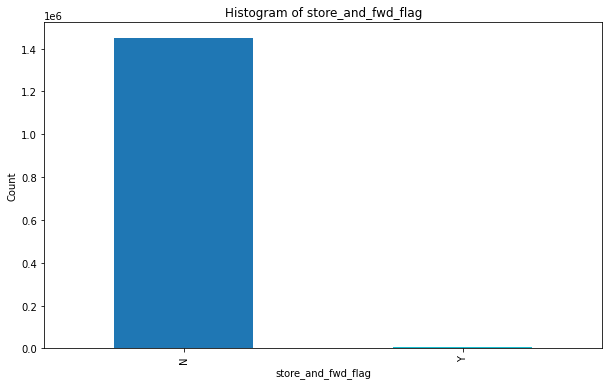

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [59]:
categorical_histogram(train_df, "store_and_fwd_flag")
train_df['store_and_fwd_flag'].value_counts()

* most of the trips are not stored and forwarded In other words, there was a direct connection between the vehicle and the server, allowing the trip data to be sent without the need for temporary storage.

## trip_duration

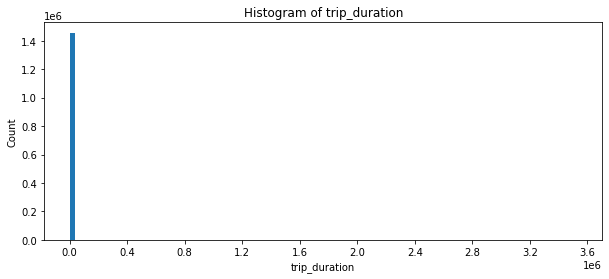

In [69]:
numerical_histogram(train_df, "trip_duration")
## train_df['trip_duration'].describe() but make float point to .2f and divide by 3600 to get hours


* because most of the trips are short, the trip_duration is short too so log(trip_duration) is better visualization

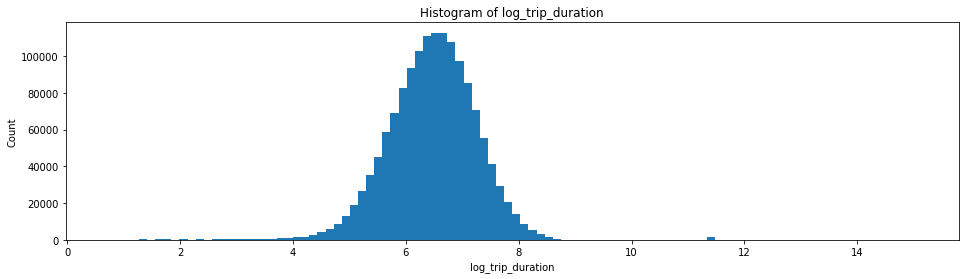

count    1458644.00
mean           0.27
std            1.45
min            0.00
25%            0.11
50%            0.18
75%            0.30
max          979.52
Name: trip_duration_hours, dtype: object

In [61]:
## visualize log(trip_duration)
train_df['log_trip_duration'] = np.log(train_df['trip_duration'].values + 1)
numerical_histogram(train_df, "log_trip_duration")

train_df['trip_duration_hours'] = train_df['trip_duration']/3600
train_df['trip_duration_hours'].describe().apply(lambda x: format(x, '.2f'))

## latitude and longitude

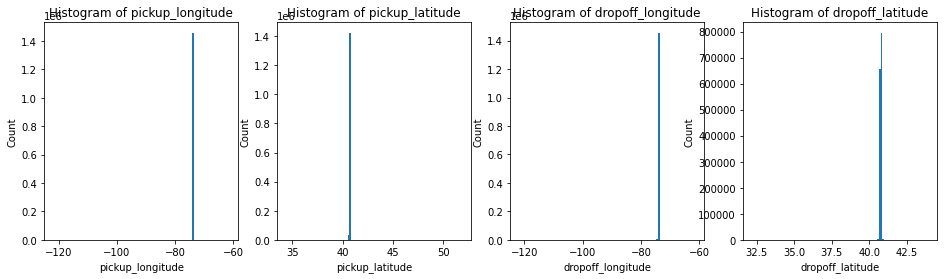

In [62]:
numerical_histogram_columns(train_df, ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

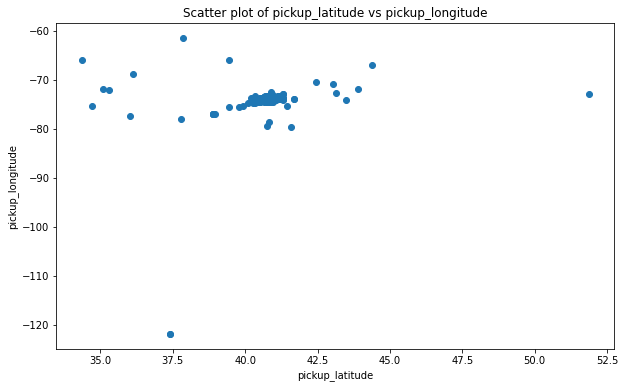

In [63]:
scatter_plot(train_df, "pickup_latitude", "pickup_longitude")

* some points are outside the main region of the data set so it is better to remove them (outliers)
* main region is between 37.5 and 45 for latitude and -65 and -80 for longitude

## correlation between trip_duration and other features

In [64]:
def plotCorrelation(train_df,col1,col2):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_df[col1], train_df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Scatter plot of '+col1+' vs '+col2)
    plt.show()

In [65]:
# correlation matrix
corr_matrix = train_df.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12476/3367316845.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


trip_duration_hours    1.000000
trip_duration          1.000000
log_trip_duration      0.253521
pickup_longitude       0.026542
vendor_id              0.020304
dropoff_longitude      0.014678
passenger_count        0.008471
month                  0.006607
hour                   0.003690
day                    0.000566
week                  -0.000708
dropoff_latitude      -0.020677
pickup_latitude       -0.029204
Name: trip_duration, dtype: float64

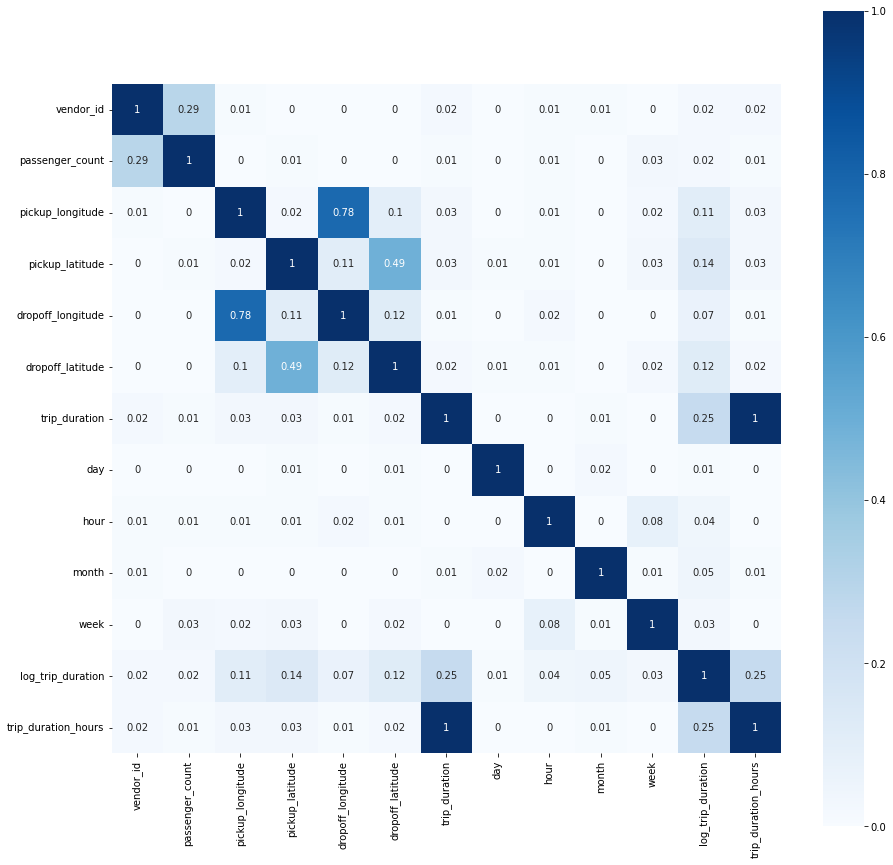

In [66]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(corr_matrix, 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()

## plot the relationship between passenger_count and vendor_id

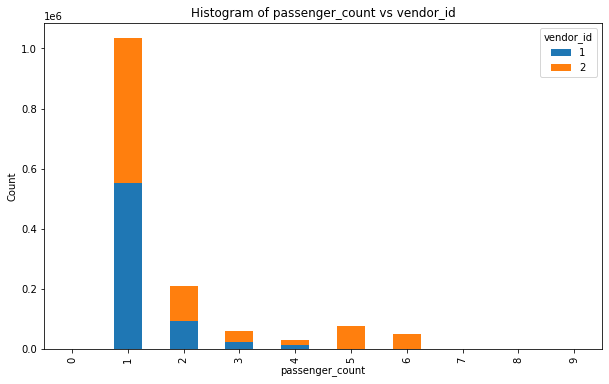

In [67]:
## plot the relationship between passenger_count and vendor_id
train_df.groupby(['passenger_count', 'vendor_id']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('passenger_count')
plt.ylabel('Count')
plt.title('Histogram of passenger_count vs vendor_id')
plt.show()


* vendor_id 2 has more trips with 5,6 passengers than vendor_id 1 so vendor_id 2 has more seats than vendor_id 1 (big cars)